## Class 006 Tables tested
External data files loaded using .read_table()

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import EDS

### Create a first datascience table object from an array
As an example we can create a table directly from data inserted into an arr

In [2]:
T=Table().with_columns('Tornados',np.array([0,0,0,1,0,0,0,1,5,1,0,0]))

In [ ]:
make_array(0,0,0,1,0,0,0,1,5,1,0,0)

In [ ]:
T=T.with_columns('Month',np.arange(1,13,1))

In [ ]:
T

In [ ]:
import numpy as np
T=T.with_columns('Month',np.arange(1,13))

In [ ]:
T.sort(0,descending=True)

In [ ]:
T=T.with_columns("Odd",T.column(1)%2).where("Odd",0)
T

### Google Trend Data

In [5]:
file = "data/multiTimeline-9.csv"
ChemBio = Table().read_table(file, skiprows=2) # skiprows is important to get all data
ChemBio

Week,Chemistry: (United States),Biology: (United States),Nobel Prize: (United States)
2019-02-03,42,40,4
2019-02-10,42,38,5
2019-02-17,36,33,6
2019-02-24,39,37,5
2019-03-03,39,37,4
2019-03-10,33,31,4
2019-03-17,34,32,4
2019-03-24,35,33,3
2019-03-31,37,36,3
2019-04-07,38,36,3


In [7]:
file = "data/GoogleTrend_debate.csv"
debate = Table().read_table(file,skiprows=2)
debate

Day,debate: (United States),harris: (United States),trump: (United States),Joe Biden: (United States)
2024-06-12,<1,1,2,1
2024-06-13,<1,1,2,1
2024-06-14,<1,1,3,1
2024-06-15,<1,1,2,1
2024-06-16,<1,1,2,1
2024-06-17,<1,1,2,2
2024-06-18,<1,1,2,2
2024-06-19,<1,1,2,1
2024-06-20,1,1,2,1
2024-06-21,1,1,2,1


#### ptrend
To plot trend data

92.0

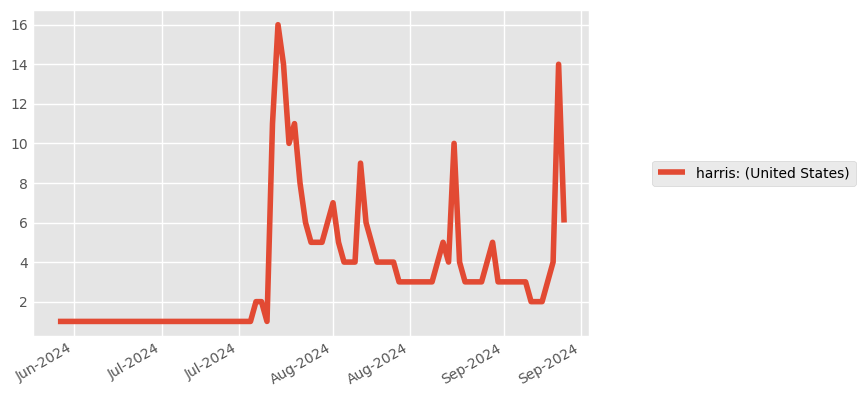

In [8]:
import EDS
# Use ptrend (short for plot trend) to plot this data.
# This function expects you to provide a table name, and the x and y column names
# Optionally, you can format the dates on the x-axis
# fmtdate="%b-%Y" tell it to use short-version month names (%b), hyphen, then year (%Y).
EDS.ptrend(debate,"Day","harris: (United States)",fmtdate="%b-%Y")

#### Can overlay by issuing multiple ptrend in same cell

92.0

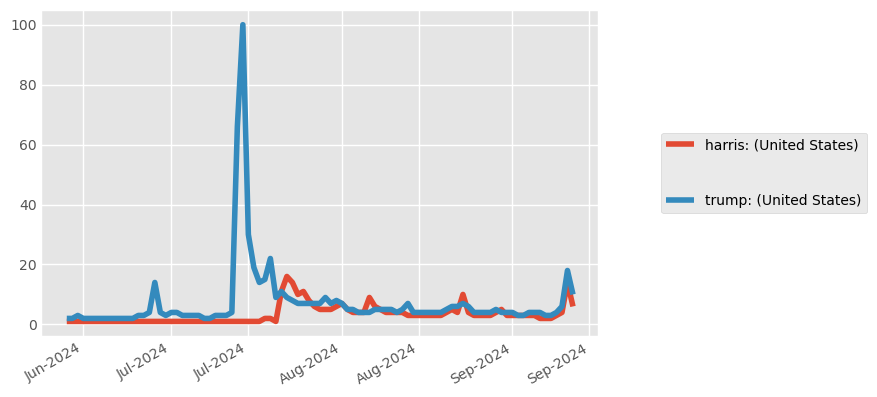

In [11]:
EDS.ptrend(debate,"Day","harris: (United States)",fmtdate="%b-%Y")
EDS.ptrend(debate,"Day","trump: (United States)",fmtdate="%b-%Y")

#### FilterTdate
To select date range

In [15]:
# Use the FilterTDate function from the EDS module.
# The function expects you to provide a table name along with the start and end dates.
# It will return a new table with only the rows in the date range you specified.
debate_JUL_SEP = EDS.FilterTdate(debate, '7/01/2024', '10/31/2024')

Filtering Table dates between 7/01/2024 10/31/2024


In [16]:
debate_JUL_SEP

Day,debate: (United States),harris: (United States),trump: (United States),Joe Biden: (United States)
2024-07-01,1,1,4,4
2024-07-02,1,1,4,3
2024-07-03,1,1,3,4
2024-07-04,1,1,3,4
2024-07-05,<1,1,3,5
2024-07-06,<1,1,3,7
2024-07-07,<1,1,2,3
2024-07-08,<1,1,2,3
2024-07-09,<1,1,3,3
2024-07-10,<1,1,3,3


73.0

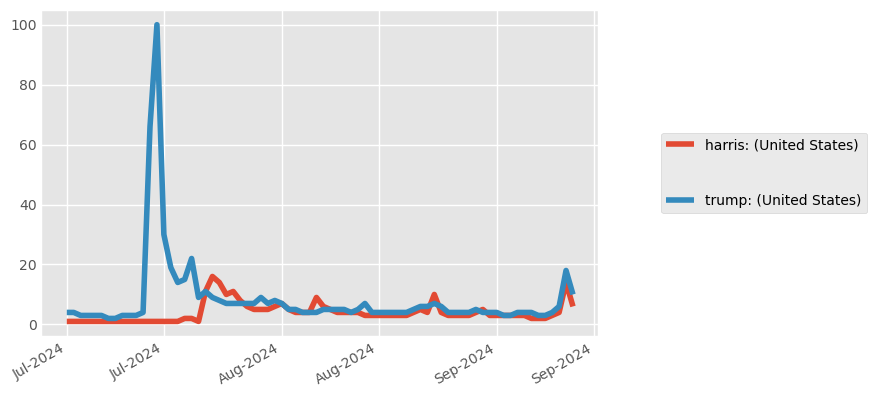

In [17]:
EDS.ptrend(debate_JUL_SEP,"Day","harris: (United States)",fmtdate="%b-%Y")
EDS.ptrend(debate_JUL_SEP,"Day","trump: (United States)",fmtdate="%b-%Y")

#### Can look at max, min, and average of columns (arrays)

In [19]:
np.mean(debate_JUL_SEP.column("trump: (United States)")) #average

8.2837837837837842

In [20]:
np.mean(debate.column("trump: (United States)")) #average

7.21505376344086

In [23]:
max(debate.column("harris: (United States)")) # maximum

16

### Census data example

In [ ]:
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'


full_census_table = Table().read_table(data)
full_census_table

In [ ]:
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
partial_census_table

In [ ]:
type(3*partial_census_table.column("AGE"))

In [ ]:
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020').relabeled('SEX','GENDER')
us_pop

In [ ]:
type(us_pop)

In [ ]:
us_pop.where('AGE',81)

In [ ]:
us_pop.where('AGE',70)

In [ ]:
us_pop.where('GENDER',0).select('AGE','2010','2020').where('AGE',are.below(100)).plot('AGE')

In [ ]:
us_pop.where('GENDER',0).select('AGE','2010','2020').where('AGE',are.below(100))

## Philadelphia COVID Tests by ZIP (CSV)
[Philly Open Data](https://www.opendataphilly.org/dataset/covid-cases/resource/d4d1e48a-d401-405c-972b-c45292c3d4f5?inner_span=True)

In [ ]:
PHLcovid ="https://phl.carto.com/api/v2/sql?q=SELECT+*+FROM+covid_cases_by_zip&filename=covid_cases_by_zip&format=csv&skipfields=cartodb_id"

Cdata = Table().read_table(PHLcovid)
Cdata.where('covid_status','POS').sort('count',descending=True)

In [ ]:
Cdata.where('covid_status','POS').sort('count',descending=True).hist('count')

In [ ]:
Cdata.where('covid_status','NEG').sort('count',descending=True).where('count',are.below(200000)).hist('count')